## IMPORTING LIBRARIES

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline
import prince as ps
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import dtale
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from scipy.spatial.distance import cdist

In [2]:
df= pd.read_csv("E:\ExcelR Assignment\Assignment 8 - PCA\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### No Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [32]:
fig = px.pie(df['Type'], values='Type', names='Type',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

### Type is a Categorical Data, that can be used to create clusters

In [7]:
sns.distplot(df)

<AxesSubplot:ylabel='Density'>

## AUTO EDA

### dtale Library for Auto Data Analysis

In [8]:
dtale.show(df, ignore_duplicate=True)

### Autoviz Library for Auto Data Visualization

Shape of your Data Set: (178, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 66


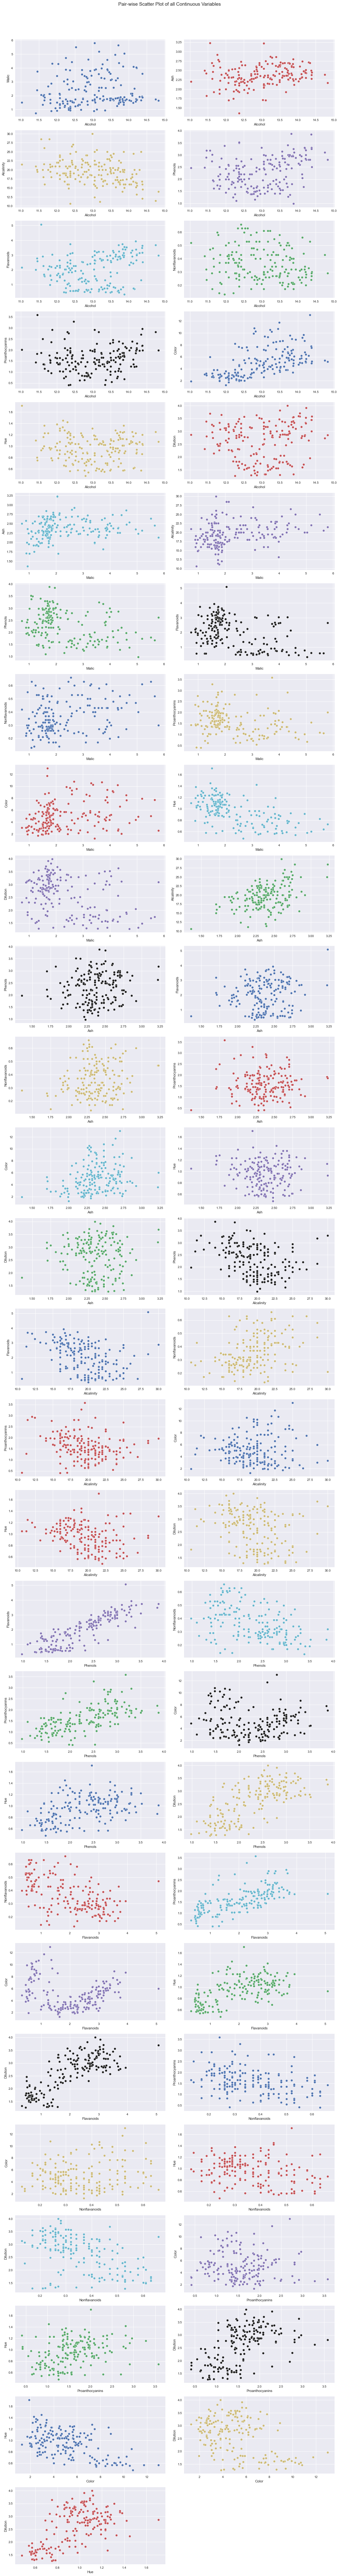

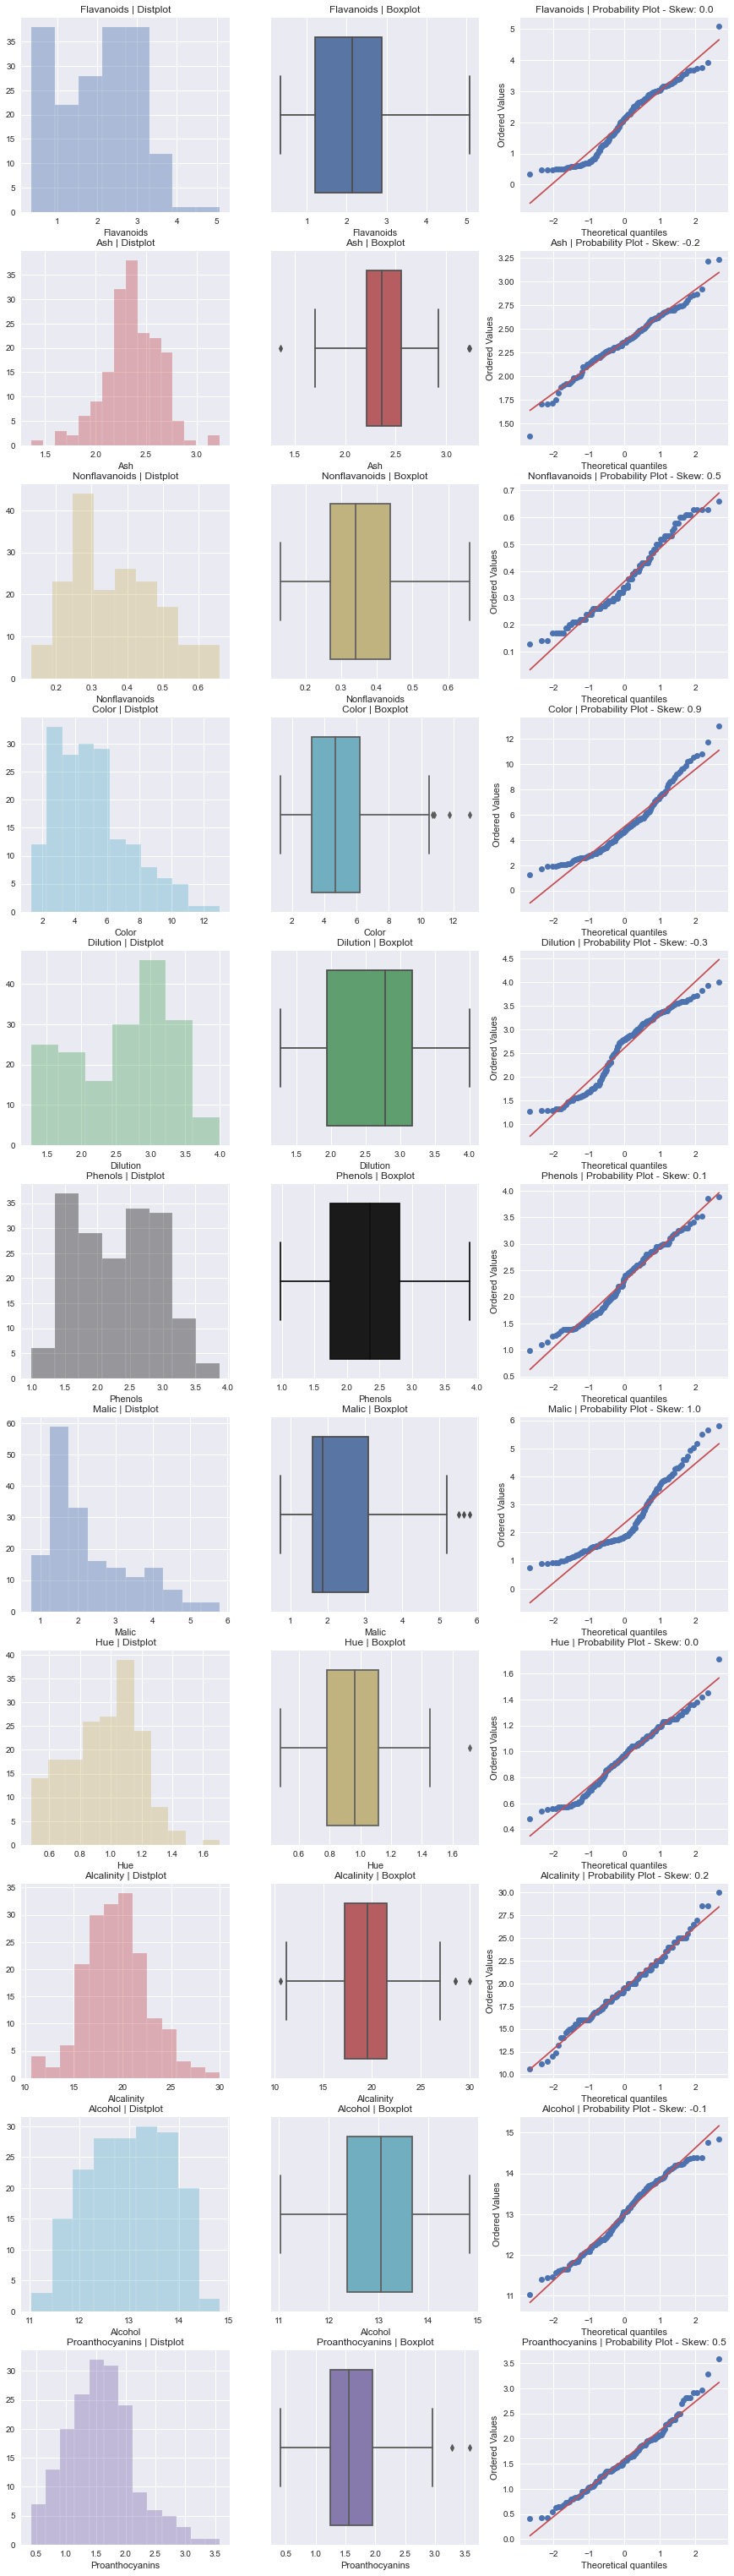

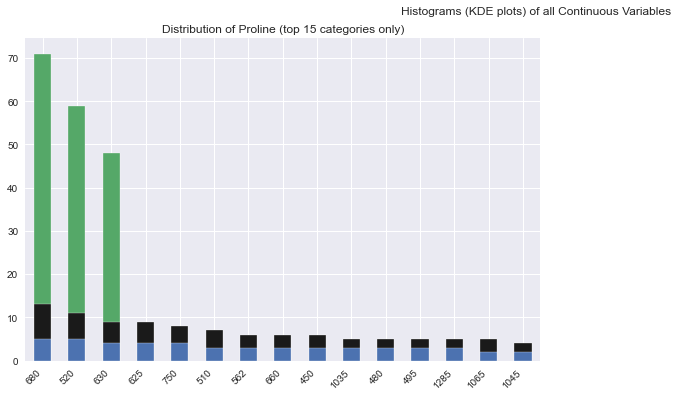

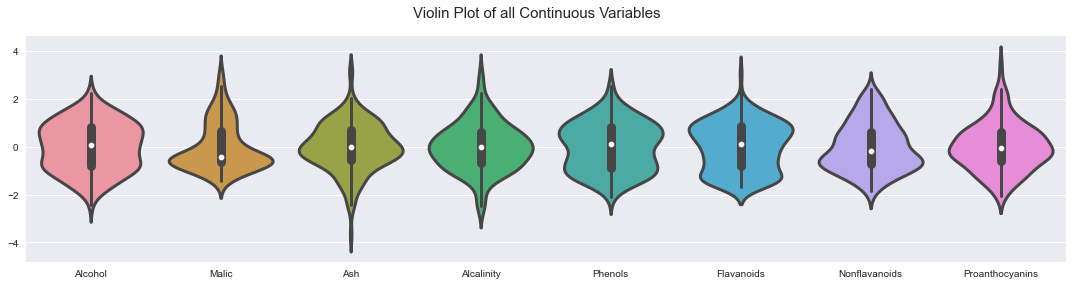

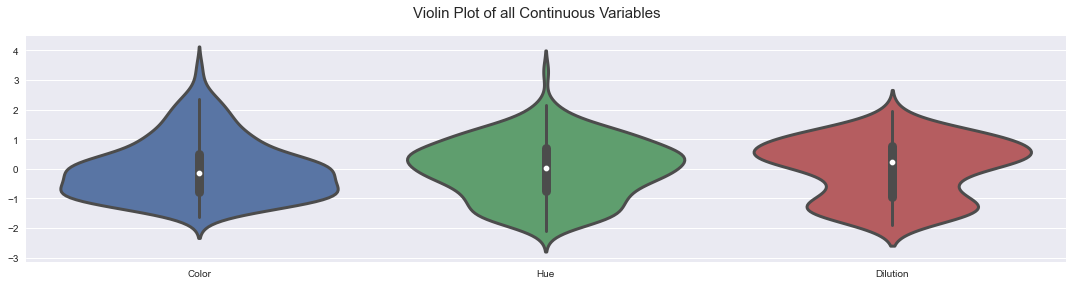

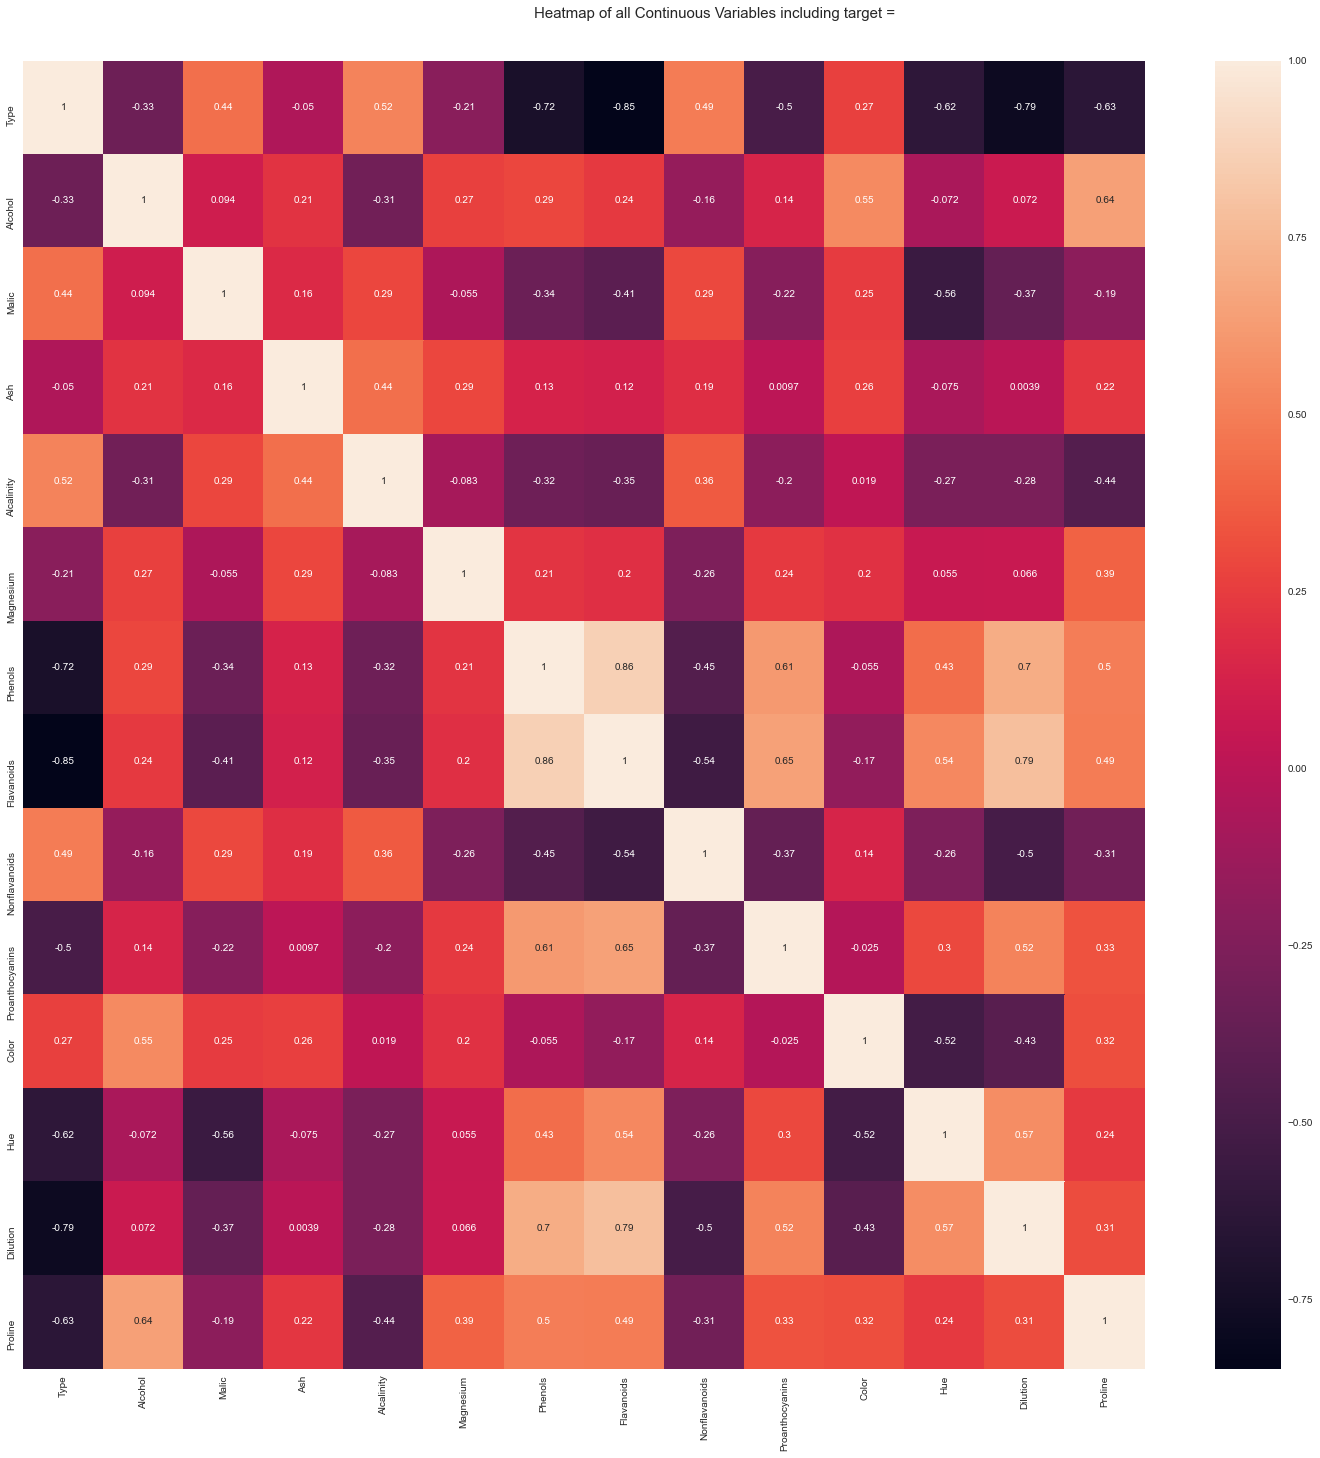

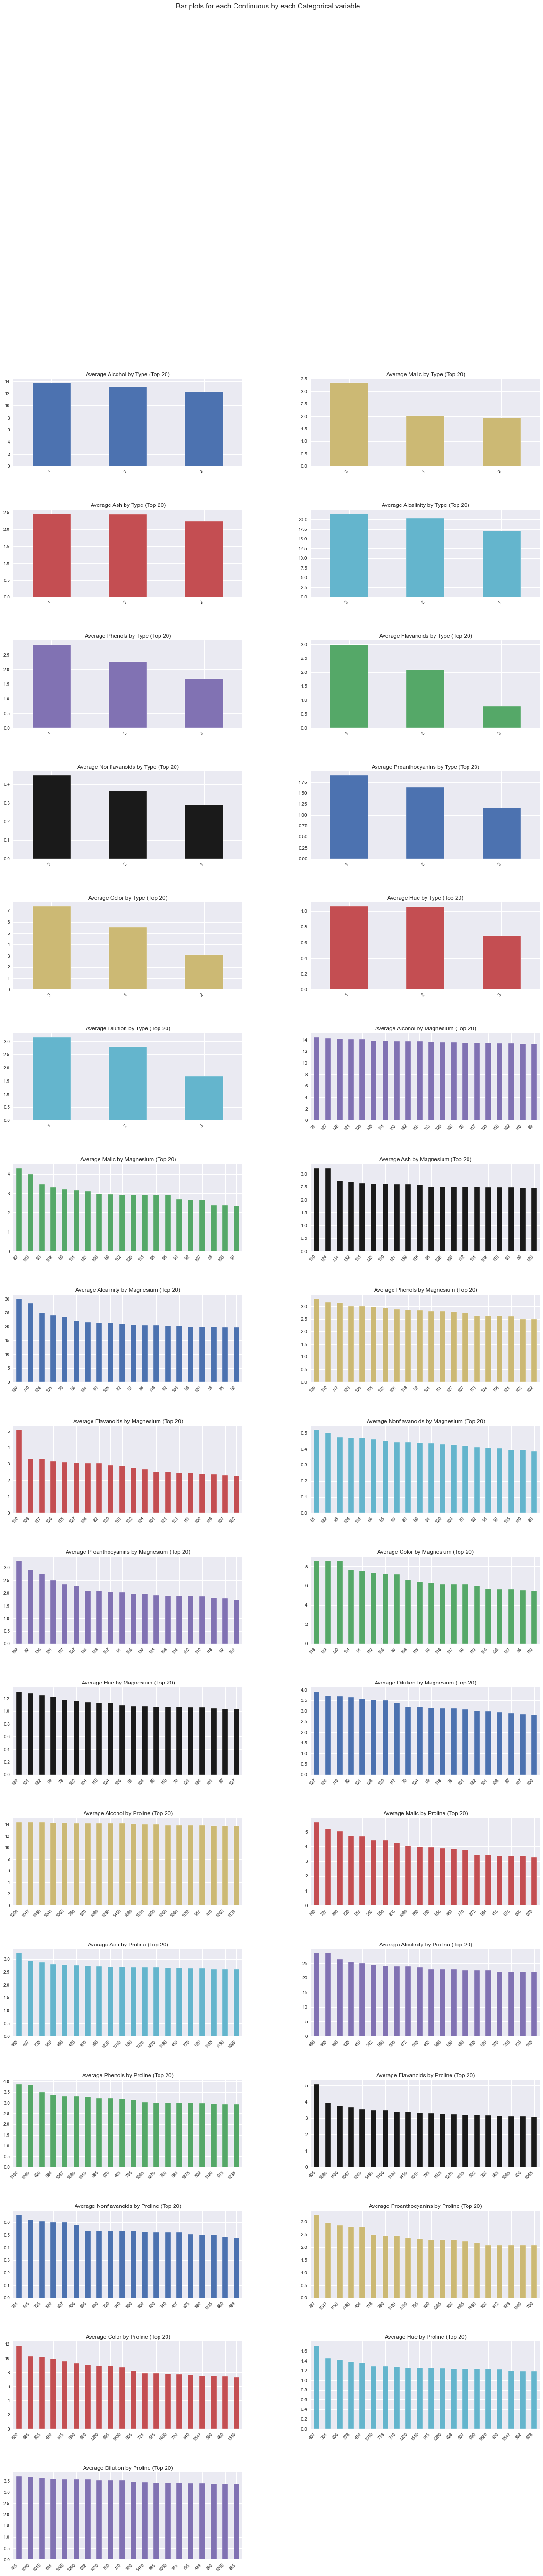

Time to run AutoViz (in seconds) = 183.821

 ###################### VISUALIZATION Completed ########################


In [9]:
df = AV.AutoViz("E:\ExcelR Assignment\Assignment 8 - PCA\wine.csv")

In [38]:
fig = px.imshow(df.corr())
fig.show()

### Inferences:

Almost all variables have moderate to good postive and negative relation

## Transformation of variables

### Applying Standardization

In [87]:
fdf = df.drop(['Type'],axis=1)

In [88]:
fdf.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [90]:
sdf = stand_func(fdf)

In [91]:
sdf.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


<AxesSubplot:ylabel='Density'>

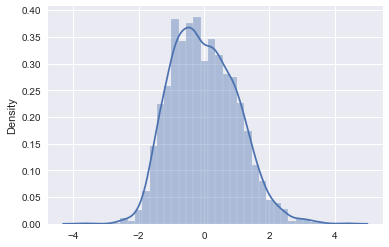

In [45]:
sns.distplot(sdf)

## PCA

In [97]:
pca = PCA(random_state=42)
pca_values = pca.fit_transform(sdf)

In [98]:
cum_nvariance = np.cumsum(pca.explained_variance_ratio_*100)
cum_nvariance

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

Text(0.5, 1.0, 'PCA Components vs Variance Plot')

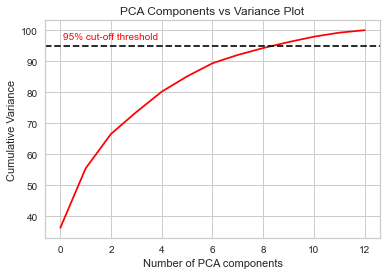

In [104]:
# Variance plot for PCA components obtained 
plt.plot(cum_nvariance,color="red")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Variance')
plt.axhline(y=95, color='k', linestyle='--')
plt.text(0.1, 97, '95% cut-off threshold', color = 'red', fontsize=10)
plt.title('PCA Components vs Variance Plot')

#### At around 8 PCA components we are getting 95% of data

In [113]:
a=pca_values[:,0:1]
b=pca_values[:,1:2]
d=pca_values[:,2:3]

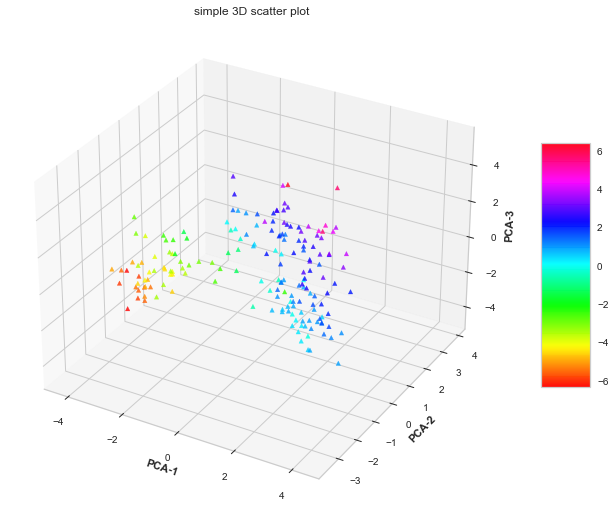

In [115]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(a, b, d,
                    alpha = 0.8,
                    c = (a + b + d),
                    cmap = my_cmap,
                    marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('PCA-1', fontweight ='bold')
ax.set_ylabel('PCA-2', fontweight ='bold')
ax.set_zlabel('PCA-3', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

In [124]:
pcastd = pd.DataFrame(pca_values,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13'])
pcastd.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


In [125]:
pcastd = pcastd.drop(['pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13'],axis=1)

In [126]:
pcastd.head()

,pca1,pca2,pca3
0,3.307421,-1.439402,-0.165273
1,2.203250,0.332455,-2.020757
2,2.509661,-1.028251,0.980054
3,3.746497,-2.748618,-0.175696
4,1.006070,-0.867384,2.020987


### 1. H-Cluster

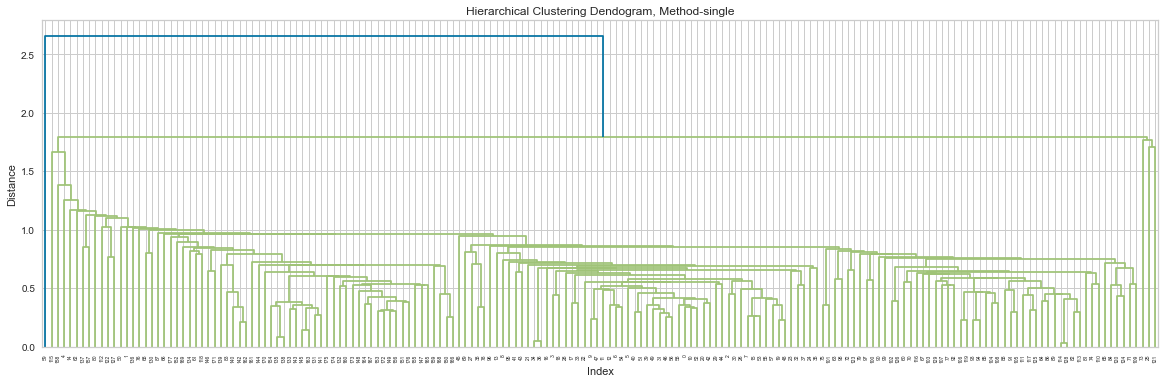

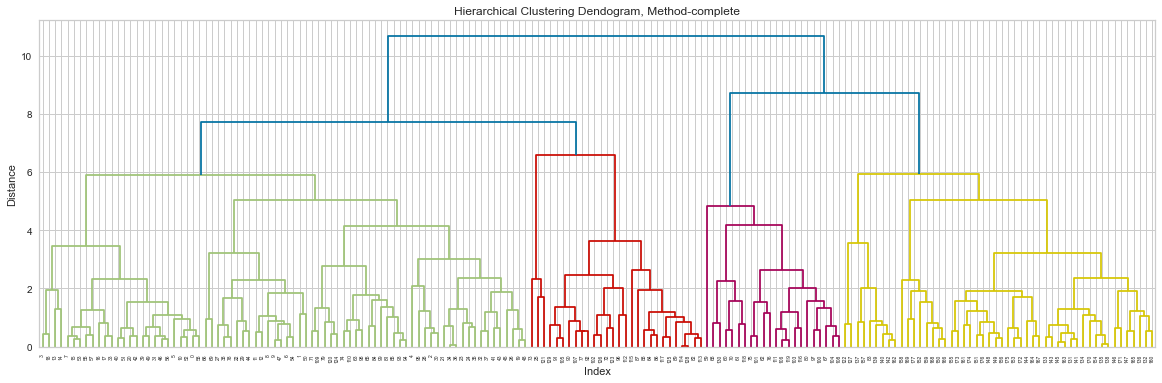

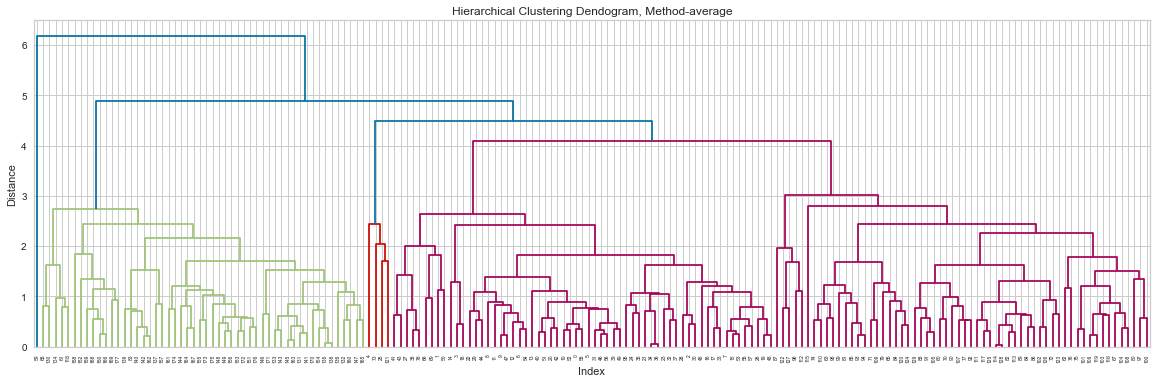

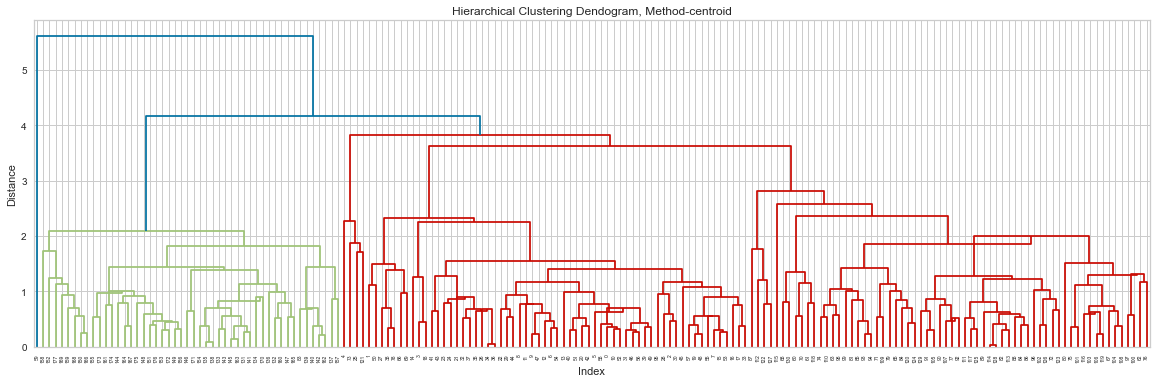

In [127]:
for methods in ['single','complete','average','centroid']:
    z = linkage(pcastd,method=methods, metric = "euclidean")
    plt.figure(figsize=(20,6))
    plt.title('Hierarchical Clustering Dendogram, Method-{}'.format(methods))
    plt.xlabel('Index')
    plt.ylabel('Distance')
    sch.dendrogram(z)
    plt.show()

In [128]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(pcastd)
        silhouette_score1 = silhouette_score(pcastd, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.36310673051041525
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3254686544245087
For n_clusters = 2 The average silhouette_score with linkage- average : 0.36310673051041525
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.39509037225075366

For n_clusters = 3 The average silhouette_score with linkage- single : 0.2166287164412593
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.28750089351606367
For n_clusters = 3 The average silhouette_score with linkage- average : 0.38672545200747754
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4459492198062964

For n_clusters = 4 The average silhouette_score with linkage- single : 0.1361608641214519
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3578484268567307
For n_clusters = 4 The average silhouette_score with linkage- average : 0.321731313111978

### Silhouette_score = 0.45 with Cluster=3 is the better one amongst all

In [150]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [151]:
y_hc = hc.fit_predict(pcastd)
Clusters=pd.DataFrame(y_hc,columns=['HClusters'])

In [152]:
Hdf = df.copy()
Hdf.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [153]:
Hdf = pd.concat([Clusters,Hdf],axis=1)

In [154]:
Hdf.head()

,HClusters,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

<Figure size 720x720 with 0 Axes>

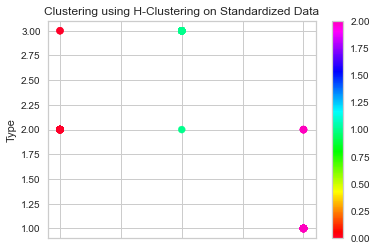

In [155]:
plt.figure(figsize=(10,10))
Hdf.plot(x="HClusters",y="Type",c=y_hc,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

In [156]:
Hdf['HClusters'].value_counts()

0    66
2    65
1    47
Name: HClusters, dtype: int64

In [157]:
Hdf['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

### II. K-Means

In [171]:
model = KMeans(random_state=42,max_iter=500,algorithm ='elkan')

In [184]:
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette')

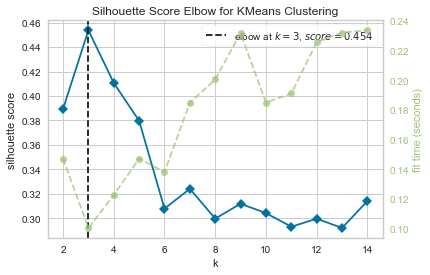

In [185]:
visualizer.fit(pcastd)
visualizer.poof()
plt.show()

In [177]:
k = list(range(2,10))
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pcastd)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pcastd.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pcastd.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2b3f3f025b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

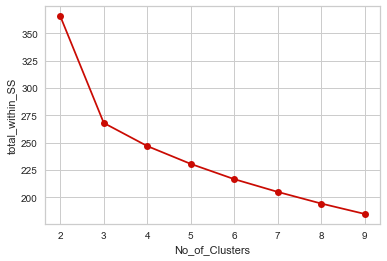

In [178]:
# Scree plot using code
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

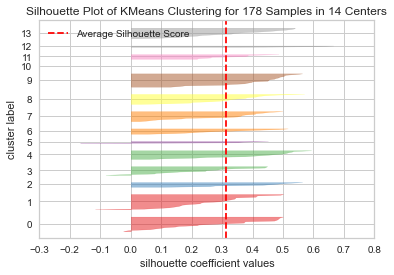

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [181]:
visualizer1 = SilhouetteVisualizer(model,k=(2,10),metric='distortion')
visualizer1.fit(pcastd)
visualizer1.poof()

In [183]:
list1= [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(pcastd)
    sil_score1= silhouette_score(pcastd, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.38938813089003294
For n_clusters = 3 The average silhouette_score is : 0.4537999848257609
For n_clusters = 4 The average silhouette_score is : 0.4106780309460923
For n_clusters = 5 The average silhouette_score is : 0.3796688345419278
For n_clusters = 6 The average silhouette_score is : 0.30776741310572353
For n_clusters = 7 The average silhouette_score is : 0.3240137134136091
For n_clusters = 8 The average silhouette_score is : 0.29964389603190816


### Silhouette_score = 0.45 with Cluster = 3 is the better one amongst all

In [186]:
cl = KMeans(n_clusters = 3)
y_kmeans = cl.fit_predict(pcastd)
md=pd.Series(cl.labels_)  # converting numpy array into pandas series object 
Kdf = df.copy()
Kdf['KCluster']=md # creating a  new column and assigning it to new column 
Kdf.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KCluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [187]:
Kdf['KCluster'].value_counts()

0    65
2    62
1    51
Name: KCluster, dtype: int64

In [188]:
Kdf['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Text(0.5, 1.0, 'Clustering using K-Clustering on Standardized Data')

<Figure size 720x720 with 0 Axes>

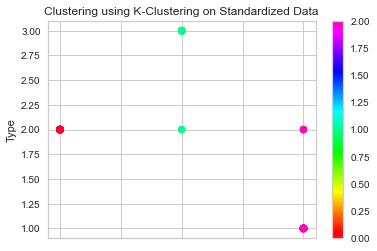

In [192]:
plt.figure(figsize=(10,10))
Kdf.plot(x="KCluster",y="Type",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Clustering on Standardized Data')

## Saving to csv file

In [193]:
Hdf.to_csv("PCAHdfStd.csv")

In [194]:
Kdf.to_csv("PCAKdfStd.csv")